In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [44]:
d = 2.0
c = 340.0
N = 10
I = 5

In [45]:
# X = pd.read_csv('caldata32_3.csv').to_numpy()
X = pd.read_csv('calipeda1.csv').to_numpy()
print("X=\n",X)

S = np.cov(X.T)
print("S=\n",S)

X=
 [[ 348  340  -71 ...  214 -164  270]
 [ 374  321 -101 ...  257 -192  293]
 [ 386  301 -126 ...  283 -206  308]
 ...
 [-179   35  208 ... -125  177 -155]
 [-171   55  213 ... -121  158 -142]
 [-159   62  217 ... -110  153 -136]]
S=
 [[ 35762.0200982   10972.3205106  -26420.50710013 ...  29578.3118393
  -25685.95747554  25614.9535555 ]
 [ 10972.3205106   32447.66579493  12308.13296555 ...   3763.13448152
  -16899.25957342  16431.68621497]
 [-26420.50710013  12308.13296555  34691.61801203 ... -26598.91651449
   13449.86349673 -13120.63684397]
 ...
 [ 29578.3118393    3763.13448152 -26598.91651449 ...  29945.49169631
  -22886.91323563  21822.92668761]
 [-25685.95747554 -16899.25957342  13449.86349673 ... -22886.91323563
   24553.50522348 -23281.63810996]
 [ 25614.9535555   16431.68621497 -13120.63684397 ...  21822.92668761
  -23281.63810996  22750.91027222]]


In [64]:
eigvals, eigvecs = np.linalg.eig(S)

In [65]:
#Sorting eigvals and eigvecs from largest to smallest

idx = eigvals.argsort()[::-1]   
eigvals = eigvals[idx]
eigvecs = eigvecs[:,idx]
print("eigvals=",eigvals)
print("eigvecs=\n",eigvecs)

eigvals= [5.19303962e+05 3.96715528e+05 9.81607359e+03 4.66221112e+03
 3.63255398e+03 3.20709359e+03 1.60937736e+03 1.09061427e+03
 3.96803498e+02 2.84033436e+02 2.39989235e+02 1.94647161e+02
 1.19977943e+02 1.03318159e+02 9.25506729e+01 7.27631037e+01
 5.93801975e+01 4.71319954e+01 4.28050176e+01 3.91363072e+01
 3.65021152e+01 3.41524935e+01 3.14543413e+01 2.64011716e+01
 2.08252711e+01 1.99785024e+01 1.92315554e+01 1.86016993e+01
 1.70308539e+01 1.63629367e+01 1.55784414e+01 1.35425124e+01]
eigvecs=
 [[-2.51096055e-01  2.01282918e-02 -4.77532988e-01 ... -3.13662626e-01
  -2.03987796e-01  2.68739096e-02]
 [-9.34803371e-02 -2.59593641e-01 -1.71718404e-01 ...  1.15174517e-01
  -1.17615457e-01  1.74212550e-01]
 [ 1.80562845e-01 -2.07250815e-01  1.85235305e-01 ... -3.14731103e-01
   8.44570018e-02  2.11034647e-01]
 ...
 [-2.29240839e-01  6.68314985e-02  1.39288924e-01 ... -3.46397039e-01
   8.58548375e-02  1.83504573e-02]
 [ 2.06197215e-01  6.87125240e-02 -3.76207592e-02 ... -3.60983095e-

In [58]:
lb_min = np.min(eigvals)
lb_mean = np.mean(eigvals)
lb_std = (np.var(eigvals))**0.5

print(lb_min, lb_mean, lb_std)

13.542512449310285 29437.487913419194 111730.06727211726


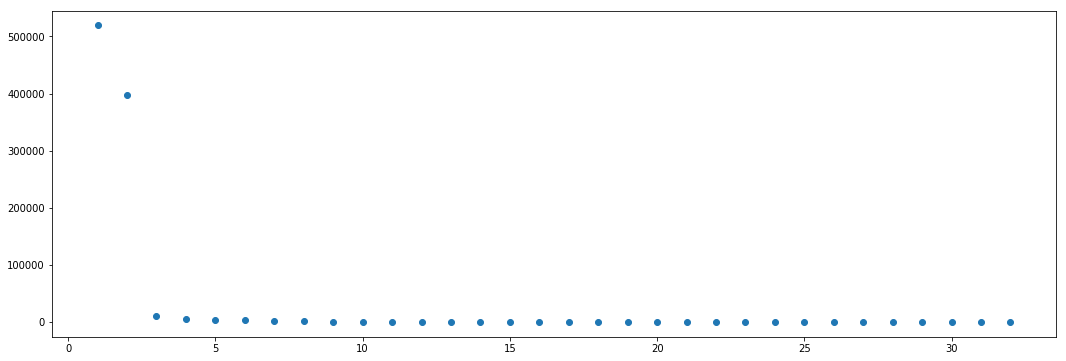

In [67]:
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(np.arange(1,len(eigvals)+1),eigvals)

In [79]:
I = 2
print("max eig vec : \n", eigvecs[0])
U = np.array(eigvecs).T
print("U=\n",U.shape)
Us, Un = U[:,:I], U[:,I:]
print("Us=\n",Us.shape)
print("Un=\n",Un.shape)

max eig vec : 
 [-0.25109606  0.02012829 -0.47753299 -0.32356215  0.00868574  0.09638031
 -0.1692145  -0.16949444 -0.11921783 -0.02001963 -0.00335704 -0.09861768
 -0.16552272 -0.01368218 -0.1229478  -0.09133676 -0.07152051 -0.06228799
 -0.21261179  0.30093009  0.12360746  0.17825725  0.1312495  -0.10565892
 -0.06044116 -0.15253755 -0.1018534  -0.20801686  0.14215892 -0.31366263
 -0.2039878   0.02687391]
U=
 (32, 32)
Us=
 (32, 2)
Un=
 (32, 30)


In [83]:
w = 2.0
N = len(eigvals)
def a(theta):
    a1 = np.exp(-1j*w*d*(np.sin(theta)/c) * np.arange(N) )
    return a1.reshape((N,1))

print(a(2))

[[1.        +0.j        ]
 [0.99994278-0.01069741j]
 [0.99977113-0.0213936j ]
 [0.99948507-0.03208734j]
 [0.99908463-0.04277741j]
 [0.99856985-0.05346258j]
 [0.99794081-0.06414164j]
 [0.99719755-0.07481335j]
 [0.99634019-0.08547651j]
 [0.9953688 -0.09612988j]
 [0.9942835 -0.10677225j]
 [0.99308443-0.1174024j ]
 [0.9917717 -0.12801912j]
 [0.99034548-0.13862118j]
 [0.98880592-0.14920738j]
 [0.98715321-0.15977651j]
 [0.98538753-0.17032735j]
 [0.98350909-0.18085871j]
 [0.98151809-0.19136936j]
 [0.97941478-0.20185811j]
 [0.97719937-0.21232377j]
 [0.97487215-0.22276512j]
 [0.97243335-0.23318099j]
 [0.96988328-0.24357017j]
 [0.96722221-0.25393147j]
 [0.96445046-0.26426372j]
 [0.96156834-0.27456572j]
 [0.95857617-0.2848363j ]
 [0.95547431-0.29507429j]
 [0.95226311-0.30527851j]
 [0.94894293-0.31544779j]
 [0.94551416-0.32558098j]]


In [97]:
def P_MU(theta):
    return complex(a(theta).conj().T @ Un @ Un.conj().T @ a(theta)).real
    
print(P_MU(2))

25.067842281365394


In [100]:
theta_vals = np.linspace(-200,200,1000)
P_MU_vals = np.array([P_MU(val) for val in theta_vals])
print(P_MU_vals)

[25.06104757 25.08491237 25.07739848 25.04300749 25.00247288 24.98050408
 24.99061525 25.02657584 25.06637399 25.08591826 25.07348199 25.03651902
 24.997348   24.97988771 24.99488778 25.03310997 25.07119487 25.08612693
 25.06895362 25.02997469 24.99276477 24.98008207 24.99973977 25.0396399
 25.07543807 25.08553529 25.0638811  25.02347371 24.98879366 24.98108416
 25.00509668 25.04606672 25.07904018 25.08415213 25.05834039 25.01711492
 24.98549582 24.98287849 25.01087637 25.05229332 25.08194749 25.08199802
 25.05241465 25.01099518 24.9829221  24.98543734 25.01699038 25.05822584
 25.08411666 25.07910503 25.046193   25.00520795 24.98111223 24.98872122
 25.02334535 25.06377505 25.08551542 25.07551626 25.03976923 24.99984179
 24.98009417 24.99267948 25.02984445 25.06885767 25.08612295 25.07128525
 25.0332404  24.99497899 24.97988366 24.99725118 25.0363889  25.07339756
 25.08593022 25.0664752  25.02670538 24.99069425 24.98048393 25.00236601
 25.04287944 25.07732684 25.0849401  25.06115809 25.

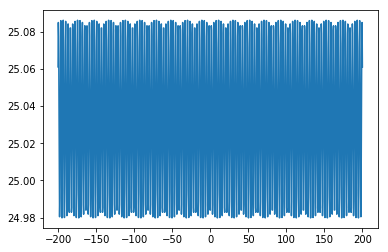

In [99]:
plt.plot(theta_vals,P_MU_vals)